In [1]:
import pandas as pd

In [2]:
Constructor_Perfomance = pd.read_csv('Constructor_Performance.csv')
Constructor_Rankings = pd.read_csv('Constructor_Rankings.csv')
Driver_Details = pd.read_csv('Driver_Details.csv')
Driver_Rankings = pd.read_csv('Driver_Rankings.csv')
Lap_Timing = pd.read_csv('Lap_Timings.csv')
Pit_Stops_Records = pd.read_csv('Pit_Stop_Records.csv')
Qualifying_Results = pd.read_csv('Qualifying_Results.csv')
Race_Result = pd.read_csv('Race_Results.csv')
Race_Schedule = pd.read_csv('Race_Schedule.csv')
Race_Status = pd.read_csv('Race_Status.csv')
Sprint_Race_Result = pd.read_csv('Sprint_Race_Results.csv')
Team_Details = pd.read_csv('Team_Details.csv')
Track_Information = pd.read_csv('Track_Information.csv')

In [3]:
# Gabung Race_Result dengan Race_Schedule biar dapat kolom 'year'
race_with_year = Race_Result.merge(Race_Schedule[['raceId', 'year']], on='raceId')

# Filter tahun 2024
race_2024 = race_with_year[race_with_year['year'] == 2024]

# Ambil constructorId unik
constructor_2024 = race_2024['constructorId'].unique()

# Ambil nama tim dari Team_Details berdasarkan constructorId
team_2024 = Team_Details[Team_Details['constructorId'].isin(constructor_2024)][['constructorId', 'name']].drop_duplicates().sort_values('constructorId').reset_index(drop=True)

team_2024


,constructorId,name
0,1,McLaren
1,3,Williams
2,6,Ferrari
3,9,Red Bull
4,15,Sauber
5,117,Aston Martin
6,131,Mercedes
7,210,Haas F1 Team
8,214,Alpine F1 Team
9,215,RB F1 Team


# Filtering + Preprocessing

In [4]:
dataframes = {
  "Constructor_Perfomance": Constructor_Perfomance,
  "Constructor_Rankings": Constructor_Rankings,
  "Driver_Details": Driver_Details,
  "Driver_Rankings": Driver_Rankings,
  "Lap_Timing": Lap_Timing,
  "Pit_Stops_Records": Pit_Stops_Records,
  "Qualifying_Results": Qualifying_Results,
  "Race_Result": Race_Result,
  "Race_Schedule": Race_Schedule,
  "Race_Status": Race_Status,
  "Sprint_Race_Result": Sprint_Race_Result,
  "Team_Details": Team_Details,
  "Track_Information": Track_Information
}

for name, df in dataframes.items():
  print(f"{name} columns:")
  print(df.columns.tolist())
  print("-" * 50)

Constructor_Perfomance columns:
['constructorResultsId', 'raceId', 'constructorId', 'points', 'status']
--------------------------------------------------
Constructor_Rankings columns:
['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']
--------------------------------------------------
Driver_Details columns:
['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']
--------------------------------------------------
Driver_Rankings columns:
['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'positionText', 'wins']
--------------------------------------------------
Lap_Timing columns:
['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
--------------------------------------------------
Pit_Stops_Records columns:
['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds']
--------------------------------------------------
Qualifying_Results columns:
['qualifyI

Race_Schedule filtered

In [5]:
Race_Schedule.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
Race_Schedule_Filtered = Race_Schedule.copy()
Race_Schedule_Filtered.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [7]:
cutoff_index1 = Race_Schedule_Filtered.columns.get_loc('date')
Race_Schedule_Filtered = Race_Schedule_Filtered.iloc[:, :cutoff_index1]
Race_Schedule_Filtered.head()

,raceId,year,round,circuitId,name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


Constructor Rankings Filtered

In [8]:
Constructor_Rankings_Filtered = Constructor_Rankings.drop(columns='positionText', axis = 1)
Constructor_Rankings_Filtered.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0


Driver Details Filtered

In [9]:
Driver_Details_Filtered = Driver_Details.copy()
cutoff_index2 = Driver_Details_Filtered.columns.get_loc('number')
Driver_Details_Filtered = Driver_Details_Filtered.iloc[:, :cutoff_index2]
Driver_Details_Filtered.head()

,driverId,driverRef
0,1,hamilton
1,2,heidfeld
2,3,rosberg
3,4,alonso
4,5,kovalainen


Pit Stop Records Filtered

In [10]:
Pit_Stops_Records_Filtered = Pit_Stops_Records.copy()
Pit_Stops_Records_Filtered = Pit_Stops_Records_Filtered.drop(columns='duration', axis = 1)
Pit_Stops_Records_Filtered.head()

,raceId,driverId,stop,lap,time,milliseconds
0,841,153,1,1,17:05:23,26898
1,841,30,1,1,17:05:52,25021
2,841,17,1,11,17:20:48,23426
3,841,4,1,12,17:22:34,23251
4,841,13,1,13,17:24:10,23842


Lap Timing Filtered

In [11]:
Lap_Timing_Filterd = Lap_Timing.copy()
Lap_Timing_Filterd = Lap_Timing_Filterd.drop(columns='time', axis = 1)
Lap_Timing_Filterd.head()

,raceId,driverId,lap,position,milliseconds
0,841,20,1,1,98109
1,841,20,2,1,93006
2,841,20,3,1,92713
3,841,20,4,1,92803
4,841,20,5,1,92342


In [12]:
Lap_Timing_Filterd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575029 entries, 0 to 575028
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   raceId        575029 non-null  int64
 1   driverId      575029 non-null  int64
 2   lap           575029 non-null  int64
 3   position      575029 non-null  int64
 4   milliseconds  575029 non-null  int64
dtypes: int64(5)
memory usage: 21.9 MB


Qualifying Result Filtered

In [13]:
Qualifying_Results_Filtered = Qualifying_Results.copy()
def time_to_milliseconds(time_str):
  try:
    if pd.isna(time_str):
        return None
    m, s = time_str.split(':')
    return int(m) * 60 * 1000 + float(s) * 1000
  except:
    return None

In [14]:
Qualifying_Results_Filtered['q1'] = Qualifying_Results['q1'].apply(time_to_milliseconds)
Qualifying_Results_Filtered['q2'] = Qualifying_Results['q2'].apply(time_to_milliseconds)
Qualifying_Results_Filtered['q3'] = Qualifying_Results['q3'].apply(time_to_milliseconds)
Qualifying_Results_Filtered.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,86572.0,85187.0,86714.0
1,2,18,9,2,4,2,86103.0,85315.0,86869.0
2,3,18,5,1,23,3,85664.0,85452.0,87079.0
3,4,18,13,6,2,4,85994.0,85691.0,87178.0
4,5,18,2,2,3,5,85960.0,85518.0,87236.0


Race Result Filtered

In [15]:
Race_Result_Filtered = Race_Result.copy()
Race_Result_Filtered = Race_Result_Filtered.drop(columns='positionText', axis = 1)
Race_Result_Filtered = Race_Result_Filtered.drop(columns='laps', axis  = 1)
Race_Result_Filtered = Race_Result_Filtered.drop(columns='time', axis  = 1)
Race_Result_Filtered = Race_Result_Filtered.drop(columns='fastestLap', axis  = 1)
Race_Result_Filtered = Race_Result_Filtered.drop(columns='fastestLapSpeed', axis  = 1)
Race_Result_Filtered = Race_Result_Filtered.drop(columns='positionOrder', axis  = 1)

In [16]:
Race_Result_Filtered['fastestLapTime'] = Race_Result['fastestLapTime'].apply(time_to_milliseconds)
Race_Result_Filtered.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId
0,1,18,1,1,22,1,1,10.0,5690616,2,87452.0,1
1,2,18,2,2,3,5,2,8.0,5696094,3,87739.0,1
2,3,18,3,3,7,7,3,6.0,5698779,5,88090.0,1
3,4,18,4,4,5,11,4,5.0,5707797,7,88603.0,1
4,5,18,5,1,23,3,5,4.0,5708630,1,87418.0,1


Race Status Filtered

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Race_Status_Filtered = Race_Status.copy()
Race_Status_Filtered['status'] = le.fit_transform(Race_Status_Filtered['status'])
Race_Status_Filtered.head()

,statusId,status
0,1,69
1,2,53
2,3,34
3,4,44
4,5,62


Sprint Race Filtered

In [18]:
Sprint_Race_Result_Filtered = Sprint_Race_Result.copy()
Sprint_Race_Result_Filtered = Sprint_Race_Result_Filtered.drop(columns='positionText', axis = 1)
Sprint_Race_Result_Filtered = Sprint_Race_Result_Filtered.drop(columns='positionOrder', axis = 1)
Sprint_Race_Result_Filtered = Sprint_Race_Result_Filtered.drop(columns='laps', axis = 1)
Sprint_Race_Result_Filtered = Sprint_Race_Result_Filtered.drop(columns='time', axis = 1)
Sprint_Race_Result_Filtered = Sprint_Race_Result_Filtered.drop(columns='fastestLap', axis = 1)

In [19]:
Sprint_Race_Result_Filtered['fastestLapTime'] = Sprint_Race_Result_Filtered['fastestLapTime'].apply(time_to_milliseconds)
Sprint_Race_Result_Filtered.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,3,1538426,90013.0,1
1,2,1061,1,131,44,1,2,2,1539856,89937.0,1
2,3,1061,822,131,77,3,3,1,1545928,89958.0,1
3,4,1061,844,6,16,4,4,0,1549704,90163.0,1
4,5,1061,846,1,4,6,5,0,1562537,90566.0,1


In [20]:
Team_Details_Filtered = Team_Details.copy()
Team_Details_Filtered = Team_Details_Filtered.drop(columns='constructorRef', axis = 1)
Team_Details_Filtered = Team_Details_Filtered.drop(columns='nationality', axis = 1)
Team_Details_Filtered = Team_Details_Filtered.drop(columns='url', axis = 1)
Team_Details_Filtered.head()

,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


# WCC

Merging Dataset

In [21]:
# team details ->   race result
Team_Details_Merged =   Race_Result_Filtered.merge(Team_Details_Filtered, on='constructorId', how='left')
Team_Details_Merged.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name
0,1,18,1,1,22,1,1,10.0,5690616,2,87452.0,1,McLaren
1,2,18,2,2,3,5,2,8.0,5696094,3,87739.0,1,BMW Sauber
2,3,18,3,3,7,7,3,6.0,5698779,5,88090.0,1,Williams
3,4,18,4,4,5,11,4,5.0,5707797,7,88603.0,1,Renault
4,5,18,5,1,23,3,5,4.0,5708630,1,87418.0,1,McLaren


In [22]:
Team_Details_Merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'points', 'milliseconds', 'rank', 'fastestLapTime',
       'statusId', 'name'],
      dtype='object')

In [23]:
# add sprint race
Sprint_Race_Merged = Team_Details_Merged.merge(
    Sprint_Race_Result_Filtered[['raceId', 'constructorId', 'points']],
    on=['raceId', 'constructorId'],
    how='left',
    suffixes=('', '_sprint')
)
Sprint_Race_Merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'points', 'milliseconds', 'rank', 'fastestLapTime',
       'statusId', 'name', 'points_sprint'],
      dtype='object')

In [24]:
Sprint_Race_Merged.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name,points_sprint
0,1,18,1,1,22,1,1,10.0,5690616,2,87452.0,1,McLaren,NaN
1,2,18,2,2,3,5,2,8.0,5696094,3,87739.0,1,BMW Sauber,NaN
2,3,18,3,3,7,7,3,6.0,5698779,5,88090.0,1,Williams,NaN
3,4,18,4,4,5,11,4,5.0,5707797,7,88603.0,1,Renault,NaN
4,5,18,5,1,23,3,5,4.0,5708630,1,87418.0,1,McLaren,NaN


In [25]:
# mergin with constructor standing
Constructor_Data = Sprint_Race_Merged.merge(
    Constructor_Rankings_Filtered[['raceId', 'constructorId', 'points', 'position']],
    on=['raceId', 'constructorId'],
    how='left',
    suffixes=('', '_ranking')
)
Constructor_Data.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'points', 'milliseconds', 'rank', 'fastestLapTime',
       'statusId', 'name', 'points_sprint', 'points_ranking',
       'position_ranking'],
      dtype='object')

In [26]:
Constructor_Data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name,points_sprint,points_ranking,position_ranking
0,1,18,1,1,22,1,1,10.0,5690616,2,87452.0,1,McLaren,NaN,14.0,1.0
1,2,18,2,2,3,5,2,8.0,5696094,3,87739.0,1,BMW Sauber,NaN,8.0,3.0
2,3,18,3,3,7,7,3,6.0,5698779,5,88090.0,1,Williams,NaN,9.0,2.0
3,4,18,4,4,5,11,4,5.0,5707797,7,88603.0,1,Renault,NaN,5.0,4.0
4,5,18,5,1,23,3,5,4.0,5708630,1,87418.0,1,McLaren,NaN,14.0,1.0


In [27]:
# adding race schedule
Constructor_Data = Constructor_Data.merge(
    Race_Schedule_Filtered[['raceId', 'year']],
    on='raceId',
    how='left'
)
Constructor_Data.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'points', 'milliseconds', 'rank', 'fastestLapTime',
       'statusId', 'name', 'points_sprint', 'points_ranking',
       'position_ranking', 'year'],
      dtype='object')

In [28]:
Constructor_Data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name,points_sprint,points_ranking,position_ranking,year
0,1,18,1,1,22,1,1,10.0,5690616,2,87452.0,1,McLaren,NaN,14.0,1.0,2008
1,2,18,2,2,3,5,2,8.0,5696094,3,87739.0,1,BMW Sauber,NaN,8.0,3.0,2008
2,3,18,3,3,7,7,3,6.0,5698779,5,88090.0,1,Williams,NaN,9.0,2.0,2008
3,4,18,4,4,5,11,4,5.0,5707797,7,88603.0,1,Renault,NaN,5.0,4.0,2008
4,5,18,5,1,23,3,5,4.0,5708630,1,87418.0,1,McLaren,NaN,14.0,1.0,2008


In [29]:
Constructor_Data = Constructor_Data[Constructor_Data['year'] >= 2022]
Constructor_Data.value_counts('year')
Constructor_Data.isnull().sum()

resultId              0
raceId                0
driverId              0
constructorId         0
number                0
grid                  0
position              0
points                0
milliseconds          0
rank                  0
fastestLapTime       62
statusId              0
name                  0
points_sprint       879
points_ranking        0
position_ranking      0
year                  0
dtype: int64

In [30]:
Constructor_Data.fillna(0, inplace = True)
print('Null')
print(Constructor_Data.isnull().sum())
print('')
print('Duplicated')
print(Constructor_Data.duplicated().sum())

Null
resultId            0
raceId              0
driverId            0
constructorId       0
number              0
grid                0
position            0
points              0
milliseconds        0
rank                0
fastestLapTime      0
statusId            0
name                0
points_sprint       0
points_ranking      0
position_ranking    0
year                0
dtype: int64

Duplicated
122


In [31]:
Constructor_Data[Constructor_Data.duplicated(keep=False)]
Constructor_Data = Constructor_Data.drop_duplicates()
Constructor_Data.duplicated().sum()

np.int64(0)

In [32]:
Constructor_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 25460 to 26818
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          1237 non-null   int64  
 1   raceId            1237 non-null   int64  
 2   driverId          1237 non-null   int64  
 3   constructorId     1237 non-null   int64  
 4   number            1237 non-null   object 
 5   grid              1237 non-null   int64  
 6   position          1237 non-null   object 
 7   points            1237 non-null   float64
 8   milliseconds      1237 non-null   object 
 9   rank              1237 non-null   object 
 10  fastestLapTime    1237 non-null   float64
 11  statusId          1237 non-null   int64  
 12  name              1237 non-null   object 
 13  points_sprint     1237 non-null   float64
 14  points_ranking    1237 non-null   float64
 15  position_ranking  1237 non-null   float64
 16  year              1237 non-null   int64  


In [33]:
Constructor_Data['number'] = pd.to_numeric(Constructor_Data['number'], errors= 'coerce')
Constructor_Data['position'] = pd.to_numeric(Constructor_Data['position'], errors= 'coerce')
Constructor_Data['milliseconds'] = pd.to_numeric(Constructor_Data['milliseconds'], errors= 'coerce')
Constructor_Data['rank'] = pd.to_numeric(Constructor_Data['rank'], errors= 'coerce')
Constructor_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 25460 to 26818
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          1237 non-null   int64  
 1   raceId            1237 non-null   int64  
 2   driverId          1237 non-null   int64  
 3   constructorId     1237 non-null   int64  
 4   number            1237 non-null   int64  
 5   grid              1237 non-null   int64  
 6   position          1078 non-null   float64
 7   points            1237 non-null   float64
 8   milliseconds      813 non-null    float64
 9   rank              1237 non-null   int64  
 10  fastestLapTime    1237 non-null   float64
 11  statusId          1237 non-null   int64  
 12  name              1237 non-null   object 
 13  points_sprint     1237 non-null   float64
 14  points_ranking    1237 non-null   float64
 15  position_ranking  1237 non-null   float64
 16  year              1237 non-null   int64  


In [34]:
Constructor_Data['name'] = le.fit_transform(Constructor_Data['name'])
Constructor_Data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name,points_sprint,points_ranking,position_ranking,year
25460,25406,1074,844,6,16,1,1.0,26.0,5853584.0,1,94570.0,1,4,0.0,44.0,1.0,2022
25461,25407,1074,832,6,55,3,2.0,18.0,5859182.0,3,95740.0,1,4,0.0,44.0,1.0,2022
25462,25408,1074,1,131,44,5,3.0,15.0,5863259.0,5,96228.0,1,7,0.0,27.0,2.0,2022
25463,25409,1074,847,131,63,9,4.0,12.0,5864795.0,6,96302.0,1,7,0.0,27.0,2.0,2022
25464,25410,1074,825,210,20,7,5.0,10.0,5868338.0,8,96623.0,1,5,0.0,10.0,3.0,2022


In [35]:
correlation_matrix = Constructor_Data.corr()
print(correlation_matrix)


                  resultId    raceId  driverId  constructorId    number  \
resultId          1.000000  0.999348  0.051543      -0.020005  0.050085   
raceId            0.999348  1.000000  0.049907      -0.023791  0.051218   
driverId          0.051543  0.049907  1.000000      -0.192456  0.011515   
constructorId    -0.020005 -0.023791 -0.192456       1.000000  0.005800   
number            0.050085  0.051218  0.011515       0.005800  1.000000   
grid             -0.008529 -0.018639  0.106357       0.235568 -0.069781   
position          0.026906  0.010721  0.153690       0.300962 -0.017879   
points            0.000240  0.015797 -0.081923      -0.336624 -0.059592   
milliseconds     -0.110081 -0.110774 -0.033204       0.035704 -0.004571   
rank             -0.035047 -0.044068  0.136825       0.214991 -0.019471   
fastestLapTime   -0.128775 -0.123370 -0.014932       0.020523 -0.041694   
statusId         -0.077607 -0.084158  0.042021       0.011318  0.006433   
name              0.15005

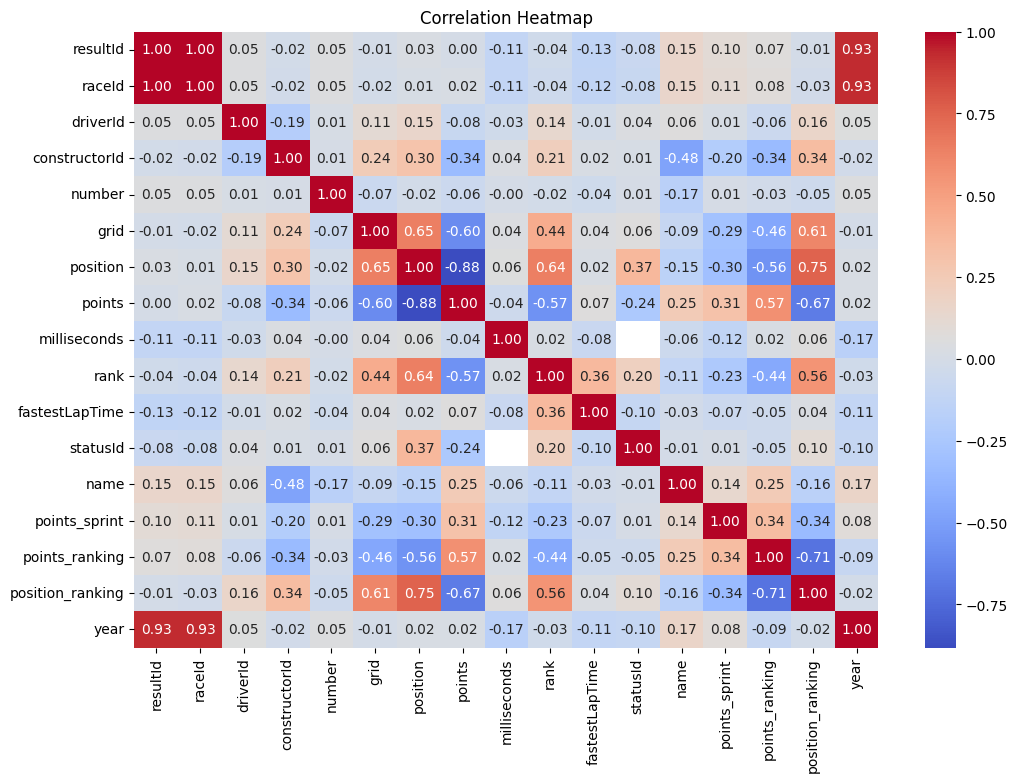

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
Constructor_Data.shape

(1237, 17)

Test Train Split

In [38]:
Constructor_Data['total_points'] = Constructor_Data['points'] + Constructor_Data['points_sprint']
Constructor_Points = Constructor_Data.groupby(['year', 'constructorId'])['total_points'].sum().reset_index()

In [39]:
print(Constructor_Data.shape)
print(Constructor_Points.shape)
print(Constructor_Data.columns)
print(Constructor_Points.columns)

(1237, 18)
(30, 3)
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'points', 'milliseconds', 'rank', 'fastestLapTime',
       'statusId', 'name', 'points_sprint', 'points_ranking',
       'position_ranking', 'year', 'total_points'],
      dtype='object')
Index(['year', 'constructorId', 'total_points'], dtype='object')


In [40]:
Constructor_Data

,resultId,raceId,driverId,constructorId,number,grid,position,points,milliseconds,rank,fastestLapTime,statusId,name,points_sprint,points_ranking,position_ranking,year,total_points
25460,25406,1074,844,6,16,1,1.0,26.0,5853584.0,1,94570.0,1,4,0.0,44.0,1.0,2022,26.0
25461,25407,1074,832,6,55,3,2.0,18.0,5859182.0,3,95740.0,1,4,0.0,44.0,1.0,2022,18.0
25462,25408,1074,1,131,44,5,3.0,15.0,5863259.0,5,96228.0,1,7,0.0,27.0,2.0,2022,15.0
25463,25409,1074,847,131,63,9,4.0,12.0,5864795.0,6,96302.0,1,7,0.0,27.0,2.0,2022,12.0
25464,25410,1074,825,210,20,7,5.0,10.0,5868338.0,8,96623.0,1,5,0.0,10.0,3.0,2022,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26814,26520,1132,839,214,31,18,16.0,0.0,NaN,16,90875.0,12,2,0.0,9.0,8.0,2024,0.0
26815,26521,1132,815,9,11,0,17.0,0.0,NaN,6,89707.0,12,9,0.0,373.0,1.0,2024,0.0
26816,26522,1132,855,15,24,14,18.0,0.0,NaN,17,91014.0,12,10,0.0,0.0,10.0,2024,0.0
26817,26523,1132,847,131,63,1,NaN,0.0,NaN,19,91298.0,34,7,0.0,221.0,4.0,2024,0.0


In [41]:
Constructor_Data.dtypes

resultId              int64
raceId                int64
driverId              int64
constructorId         int64
number                int64
grid                  int64
position            float64
points              float64
milliseconds        float64
rank                  int64
fastestLapTime      float64
statusId              int64
name                  int64
points_sprint       float64
points_ranking      float64
position_ranking    float64
year                  int64
total_points        float64
dtype: object

In [42]:
from sklearn.model_selection import train_test_split

x = Constructor_Data.groupby(['year', 'constructorId']).agg({
  'grid': 'mean',
  'position': 'mean',
  'rank': 'mean',
  'points': 'sum',
  'points_sprint': 'sum',
  'milliseconds': 'mean',
}).reset_index()

x = x.sort_values(['year', 'constructorId']).reset_index(drop=True)
x = pd.get_dummies(x, columns=['constructorId'], drop_first=False)
x = x.drop(columns=['year'])

Constructor_Points = Constructor_Points.sort_values(['year', 'constructorId']).reset_index(drop=True)
y = Constructor_Points['total_points'].reset_index(drop=True)


print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2)

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

(30, 18)
(30,)


In [43]:
# import numpy as np
# y_train = np.reshape(y_train, (-1, 1))
# y_test = np.reshape(y_test,(-1 , 1))

Random Forest Regression Implementation

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, accuracy_score

model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Training Data Evaluation:")
print(f'MAE (Training): {mean_absolute_error(y_train, y_train_pred)}')
print(f'MSE (Training): {mean_squared_error(y_train, y_train_pred)}')
print(f'R2 Score (Training): {r2_score(y_train, y_train_pred)}')
print("\nTesting Data Evaluation:")
print(f'MAE (Testing): {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE (Testing): {mean_squared_error(y_test, y_test_pred)}')
print(f'R2 Score (Testing): {r2_score(y_test, y_test_pred)}')

Training Data Evaluation:
MAE (Training): 17.540416666666665
MSE (Training): 988.1433708333326
R2 Score (Training): 0.9892067126491046

Testing Data Evaluation:
MAE (Testing): 52.62166666666665
MSE (Testing): 6097.443649999997
R2 Score (Testing): 0.8901035885507619


Random Forest Tuning 

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_estimators': [50, 100, 200, 300],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

TunedModel = RandomForestRegressor()

GridSearch = GridSearchCV(estimator=TunedModel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [46]:
GridSearch.fit(x_train,y_train)

print('best parameter: ', GridSearch.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


e:\anaconda\envs\machine_learning\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best parameter:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [47]:
TunnedRandomForest = GridSearch.best_estimator_
y_pred_tuned = TunnedRandomForest.predict(x_test)

print("Training Data Evaluation:")
print(f'MAE (Training): {mean_absolute_error(y_train, y_train_pred)}')
print(f'MSE (Training): {mean_squared_error(y_train, y_train_pred)}')
print(f'R2 Score (Training): {r2_score(y_train, y_train_pred)}')
print('\n Testing Data Evaluation(after tuning)')
print(f'MAE (Testing): {mean_absolute_error(y_test, y_pred_tuned)}')
print(f'MSE (Testing): {mean_squared_error(y_test, y_pred_tuned)}')
print(f'R2 Score (Testing): {r2_score(y_test, y_pred_tuned)}')

Training Data Evaluation:
MAE (Training): 17.540416666666665
MSE (Training): 988.1433708333326
R2 Score (Training): 0.9892067126491046

 Testing Data Evaluation(after tuning)
MAE (Testing): 75.74166666666667
MSE (Testing): 12576.171983333334
R2 Score (Testing): 0.7733351466500585


ANN Model Implementation

In [48]:
from sklearn.preprocessing import StandardScaler

x = Constructor_Data.groupby(['year', 'constructorId']).agg({
  'grid': 'mean',
  'position': 'mean',
  'rank': 'mean',
  'points': 'sum',
  'points_sprint': 'sum',
  'milliseconds': 'mean',
}).reset_index()

x = x.sort_values(['year', 'constructorId']).reset_index(drop=True)
x = pd.get_dummies(x, columns=['constructorId'], drop_first=False)
x = x.drop(columns=['year'])

Constructor_Points = Constructor_Points.sort_values(['year', 'constructorId']).reset_index(drop=True)
y = Constructor_Points['total_points'].reset_index(drop=True)


scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, SGD, RMSprop

In [50]:
x_train.shape

(24, 18)

In [51]:
model = Sequential()

model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))

# hidden layer 1
model.add(Dense(64, activation='relu'))
# hidden layer 2
model.add(Dense(32, activation='relu'))
# hidden layer 3
model.add(Dense(16, activation='relu'))
# output layer
model.add(Dense(1))

model.compile(optimizer=Adam(), loss='mean_squared_error')

e:\anaconda\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Melatih model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 177965.6250 - val_loss: 60979.6484
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 177880.0156 - val_loss: 60949.7422
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 177798.5781 - val_loss: 60914.6484
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 177722.1094 - val_loss: 60877.3359
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 177640.1875 - val_loss: 60840.8203
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 177555.2031 - val_loss: 60803.1328
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 177463.2344 - val_loss: 60762.1875
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 177363.5469 - val_loss: 60722.7109
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 177262.3594 - val_loss: 60679.6875
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 177156.5469 - val_loss: 60633.7891
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 17

In [53]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("Training Data Evaluation:")
print(f'MAE (Training): {mean_absolute_error(y_train, y_pred_train)}')
print(f'MSE (Training): {mean_squared_error(y_train, y_pred_train)}')
print(f'R2 Score (Training): {r2_score(y_train, y_pred_train)}')
print("\nTesting Data Evaluation:")
print(f'MAE (Testing): {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE (Testing): {mean_squared_error(y_test, y_pred_test)}')
print(f'R2 Score (Testing): {r2_score(y_test, y_pred_test)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Training Data Evaluation:
MAE (Training): 36.50952768325806
MSE (Training): 2596.9012494827753
R2 Score (Training): 0.9716345803302523

Testing Data Evaluation:
MAE (Testing): 112.04709370930989
MSE (Testing): 20947.28899359895
R2 Score (Testing): 0.6224595056345212


XGBoost implementation

In [54]:
from xgboost import XGBRegressor

In [55]:
x = Constructor_Data.groupby(['year', 'constructorId']).agg({
  'grid': 'mean',
  'position': 'mean',
  'rank': 'mean',
  'points': 'sum',
  'points_sprint': 'sum',
  'milliseconds': 'mean',
}).reset_index()

x = x.sort_values(['year', 'constructorId']).reset_index(drop=True)
x = pd.get_dummies(x, columns=['constructorId'], drop_first=False)
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)
x = x.drop(columns=['year'])

Constructor_Points = Constructor_Points.sort_values(['year', 'constructorId']).reset_index(drop=True)
y = Constructor_Points['total_points'].reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
xgb_model = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=42)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

print("Training Data Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2 Score:", r2_score(y_train, y_pred_train))

print("\nTesting Data Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2 Score:", r2_score(y_test, y_pred_test))

Training Data Evaluation:
MAE: 0.3835132146875064
MSE: 1.3086317480274448
R2 Score: 0.9999863476434939

Testing Data Evaluation:
MAE: 33.76490465799967
MSE: 2157.1495951127654
R2 Score: 0.9332934316607802


XGBoost Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
xgb_tunned = XGBRegressor(objective='reg:squarederror', random_state=42)

In [60]:
param_dist = {
  'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.05, 0.1],
  'max_depth': [3, 5, 7],
  'subsample': [0.7, 0.8, 1.0],
  'colsample_bytree': [0.7, 0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(
  estimator=xgb_tunned,
  param_distributions=param_dist,
  n_iter=20,
  scoring='neg_mean_squared_error',
  cv=3,
  verbose=1,
  n_jobs=-1,
  random_state=42
)

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [61]:
xgb_tunned = random_search.best_estimator_

y_pred_test = xgb_tunned.predict(x_test)
print("Training Data Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2 Score:", r2_score(y_train, y_pred_train))
print("\nTesting Data Evaluation (After Tuning):")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2 Score:", r2_score(y_test, y_pred_test))

Training Data Evaluation:
MAE: 0.3835132146875064
MSE: 1.3086317480274448
R2 Score: 0.9999863476434939

Testing Data Evaluation (After Tuning):
MAE: 42.638471603393555
MSE: 2567.868887576044
R2 Score: 0.9205925626005119


Predictions using XGBOOST

In [62]:
x = Constructor_Data.groupby(['year', 'constructorId']).agg({
  'grid': 'mean',
  'position': 'mean',
  'rank': 'mean',
  'points': 'sum',
  'points_sprint': 'sum',
  'milliseconds': 'mean',
}).reset_index()

x = x.sort_values(['year', 'constructorId']).reset_index(drop=True)
x = pd.get_dummies(x, columns=['constructorId'], drop_first=False)
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)
x = x.drop(columns=['year'])

Constructor_Points = Constructor_Points.sort_values(['year', 'constructorId']).reset_index(drop=True)
y = Constructor_Points['total_points'].reset_index(drop=True)

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               30 non-null     float64
 1   position           30 non-null     float64
 2   rank               30 non-null     float64
 3   points             30 non-null     float64
 4   points_sprint      30 non-null     float64
 5   milliseconds       30 non-null     float64
 6   constructorId_1    30 non-null     int64  
 7   constructorId_3    30 non-null     int64  
 8   constructorId_6    30 non-null     int64  
 9   constructorId_9    30 non-null     int64  
 10  constructorId_15   30 non-null     int64  
 11  constructorId_51   30 non-null     int64  
 12  constructorId_117  30 non-null     int64  
 13  constructorId_131  30 non-null     int64  
 14  constructorId_210  30 non-null     int64  
 15  constructorId_213  30 non-null     int64  
 16  constructorId_214  30 non-nu

In [64]:
model_rf = xgb_tunned.fit(x,y)

C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\496666705.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.984615384615385' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\496666705.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.034188034188034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\496666705.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Users\

   constructorId  predicted_total_points            team
0              9                     865        Red Bull
1              6                     617         Ferrari
2            131                     579        Mercedes
3              1                     515         McLaren
4            117                     300    Aston Martin
5            214                     150  Alpine F1 Team
6            210                      62    Haas F1 Team
7            215                      51      RB F1 Team
8              3                      44        Williams
9             15                      32          Sauber


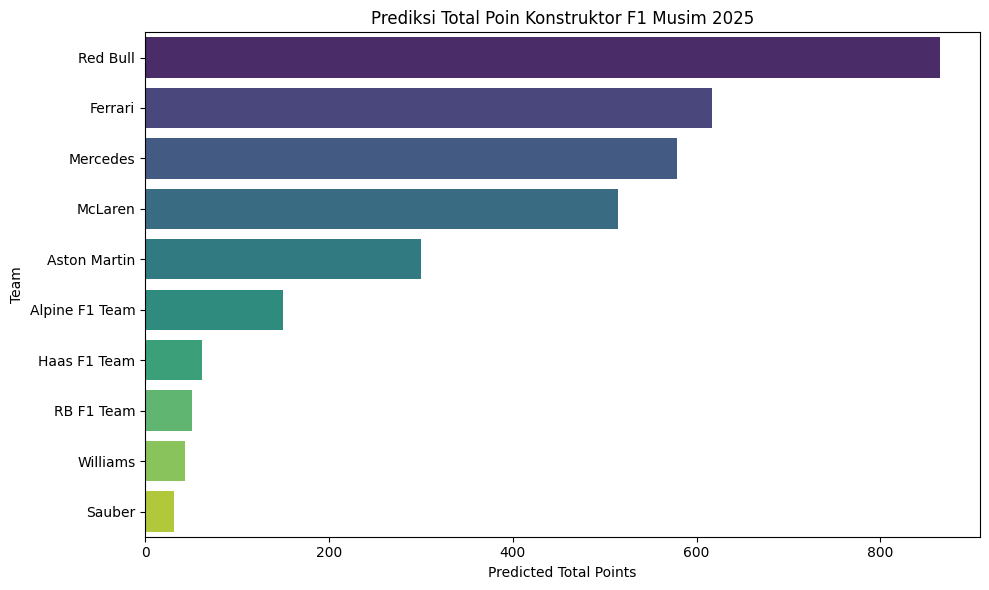

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Hitung rata-rata statistik per constructor
def get_mean_stats_by_constructor(constructor_id):
    df = Constructor_Data[Constructor_Data['constructorId'] == constructor_id]
    return {
        'grid': df['grid'].mean(),
        'position': df['position'].mean(),
        'rank': df['rank'].mean(),
        'points': df['points'].sum(),
        'points_sprint': df['points_sprint'].sum(),
        'milliseconds': df['milliseconds'].mean()
    }

# Langkah 2: Daftar constructor ID yang diprediksi
constructor_ids = [1, 3, 6, 9, 15, 117, 131, 210, 214, 215]

# Langkah 3: Siapkan x_template berdasarkan fitur x
feature_columns = x.columns.tolist()
x_template = pd.DataFrame(0, index=range(len(constructor_ids)), columns=feature_columns)

# Langkah 4: Buat input prediksi untuk 2025
x_2025 = x_template.copy()

for i, cid in enumerate(constructor_ids):
    stats = get_mean_stats_by_constructor(cid)
    for key in stats:
        x_2025.loc[i, key] = stats[key]
    x_2025.loc[i, f'constructorId_{cid}'] = 1  # Set dummy variable constructor aktif

# Langkah 5: Lakukan prediksi
predictions_2025 = model_rf.predict(x_2025)
predictions_2025 = np.round(predictions_2025).astype(int)  # Buat hasil bulat

# Langkah 6: Buat DataFrame hasil prediksi
result_df = pd.DataFrame({
    'constructorId': constructor_ids,
    'predicted_total_points': predictions_2025
})

# Langkah 7: Mapping ID ke nama tim
constructor_map = {
    1: "McLaren",
    3: "Williams",
    6: "Ferrari",
    9: "Red Bull",
    15: "Sauber",
    117: "Aston Martin",
    131: "Mercedes",
    210: "Haas F1 Team",
    214: "Alpine F1 Team",
    215: "RB F1 Team"
}

result_df['team'] = result_df['constructorId'].map(constructor_map)

# Langkah 8: Urutkan dari poin tertinggi
result_df = result_df.sort_values(by='predicted_total_points', ascending=False).reset_index(drop=True)

# Output hasil
print(result_df)

# (Opsional) Langkah 9: Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x='predicted_total_points', y='team', palette='viridis')
plt.xlabel('Predicted Total Points')
plt.ylabel('Team')
plt.title('Prediksi Total Poin Konstruktor F1 Musim 2025')
plt.tight_layout()
plt.show()


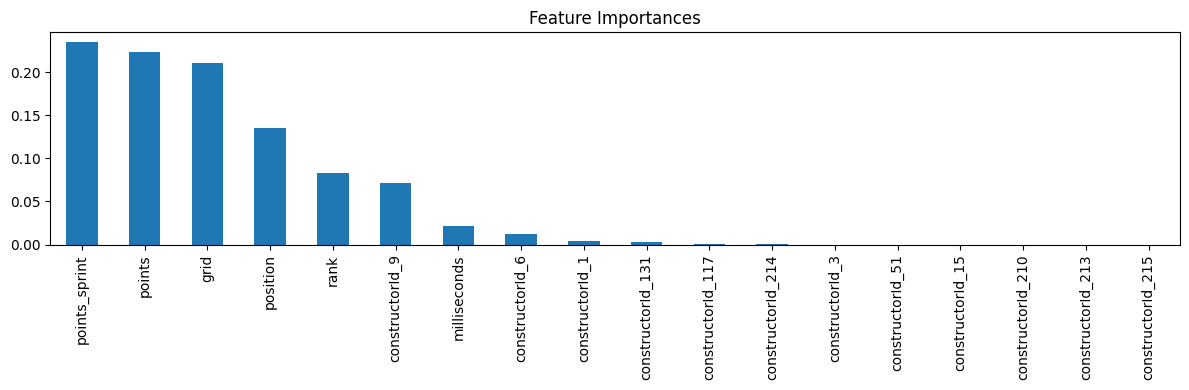

In [66]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4))
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [67]:
import numpy as np

y_pred = model_rf.predict(x)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.9664
MAE: 25.77
RMSE: 53.27


Prediction using RANDOM FOREST

In [68]:
x = Constructor_Data.groupby(['year', 'constructorId']).agg({
  'grid': 'mean',
  'position': 'mean',
  'rank': 'mean',
  'points': 'sum',
  'points_sprint': 'sum',
  'milliseconds': 'mean',
}).reset_index()

x = x.sort_values(['year', 'constructorId']).reset_index(drop=True)
x = pd.get_dummies(x, columns=['constructorId'], drop_first=False)
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)
x = x.drop(columns=['year'])

Constructor_Points = Constructor_Points.sort_values(['year', 'constructorId']).reset_index(drop=True)
y = Constructor_Points['total_points'].reset_index(drop=True)

In [69]:
model_rf = RandomForestRegressor().fit(x,y)

In [72]:
x.columns.tolist()


['grid',
 'position',
 'rank',
 'points',
 'points_sprint',
 'milliseconds',
 'constructorId_1',
 'constructorId_3',
 'constructorId_6',
 'constructorId_9',
 'constructorId_15',
 'constructorId_51',
 'constructorId_117',
 'constructorId_131',
 'constructorId_210',
 'constructorId_213',
 'constructorId_214',
 'constructorId_215']

C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\2559974309.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.984615384615385' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\2559974309.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.034188034188034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Users\gavri\AppData\Local\Temp\ipykernel_7984\2559974309.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_2025.loc[i, key] = stats[key]
C:\Use

   constructorId            team  predicted_total_points
0              9        Red Bull                     876
1              6         Ferrari                     691
2            131        Mercedes                     680
3              1         McLaren                     637
4            117    Aston Martin                     387
5            214  Alpine F1 Team                     234
6            210    Haas F1 Team                      63
7            215      RB F1 Team                      40
8              3        Williams                      32
9             15          Sauber                       4


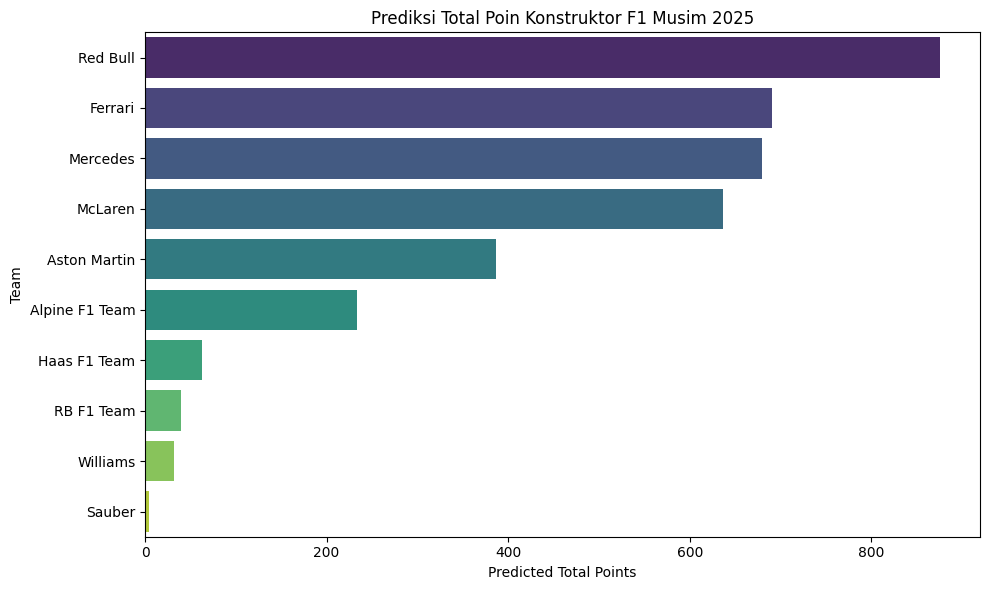

In [75]:
def get_mean_stats_by_constructor(constructor_id):
    df = Constructor_Data[Constructor_Data['constructorId'] == constructor_id]
    return {
        'grid': df['grid'].mean(),
        'position': df['position'].mean(),
        'rank': df['rank'].mean(),
        'points': df['points'].sum(),
        'points_sprint': df['points_sprint'].sum(),
        'milliseconds': df['milliseconds'].mean()
    }

constructor_ids = [1,3,6,9,15,117,131,210,214,215]  # Red Bull, Ferrari, Mercedes
feature_columns = x.columns.tolist()
x_template = pd.DataFrame(0, index=range(len(constructor_ids)), columns=feature_columns)
x_2025 = x_template.copy()

for i, cid in enumerate(constructor_ids):
    stats = get_mean_stats_by_constructor(cid)
    for key in stats:
        x_2025.loc[i, key] = stats[key]
    x_2025.loc[i, f'constructorId_{cid}'] = 1


# Prediksi
predictions_2025 = model_rf.predict(x_2025)

predictions_2025 = np.round(predictions_2025).astype(int)

result_df = pd.DataFrame({
    'constructorId': constructor_ids,
    'predicted_total_points': predictions_2025
})

constructor_map = {
    1: "McLaren",
    3: "Williams",
    6: "Ferrari",
    9: "Red Bull",
    15: "Sauber",
    117: "Aston Martin",
    131: "Mercedes",
    210: "Haas F1 Team",
    214: "Alpine F1 Team",
    215: "RB F1 Team"
}

# Tambahkan nama tim
result_df['team'] = result_df['constructorId'].map(constructor_map)

result_df = result_df.sort_values(by='predicted_total_points', ascending=False)

result_df = result_df[['constructorId', 'team', 'predicted_total_points']].reset_index(drop=True)


# Output
print(f'{result_df}')

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x='predicted_total_points', y='team', palette='viridis')
plt.xlabel('Predicted Total Points')
plt.ylabel('Team')
plt.title('Prediksi Total Poin Konstruktor F1 Musim 2025')
plt.tight_layout()
plt.show()


In [74]:
import numpy as np

y_pred = model_rf.predict(x)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.9843
MAE: 18.67
RMSE: 36.46
